## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
df = pd.read_excel("./data/Rotten_Tomatoes_Movies3.xls")
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


## Dataset Understanding

In [3]:
df.shape

(16638, 16)

In [4]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [5]:
df.dtypes

movie_title                   object
movie_info                    object
critics_consensus             object
rating                        object
genre                         object
directors                     object
writers                       object
cast                          object
in_theaters_date      datetime64[ns]
on_streaming_date     datetime64[ns]
runtime_in_minutes           float64
studio_name                   object
tomatometer_status            object
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
dtype: object

In [6]:
df.dtypes[df.dtypes == object]

movie_title           object
movie_info            object
critics_consensus     object
rating                object
genre                 object
directors             object
writers               object
cast                  object
studio_name           object
tomatometer_status    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [8]:
# Convert to categorical types where appropriate
df["rating"] = df["rating"].astype("category")
df["genre"] = df["genre"].astype("category")
df["tomatometer_status"] = df["tomatometer_status"].astype("category")

# Ensure date columns are in the correct datetime format
df["in_theaters_date"] = pd.to_datetime(df["in_theaters_date"])
df["on_streaming_date"] = pd.to_datetime(df["on_streaming_date"])

# Ensure numeric columns are in the correct numeric format
df["runtime_in_minutes"] = pd.to_numeric(df["runtime_in_minutes"], errors="coerce")
df["tomatometer_rating"] = pd.to_numeric(df["tomatometer_rating"], errors="coerce")
df["tomatometer_count"] = pd.to_numeric(df["tomatometer_count"], errors="coerce")
df["audience_rating"] = pd.to_numeric(df["audience_rating"], errors="coerce")
df.dtypes

movie_title                   object
movie_info                    object
critics_consensus             object
rating                      category
genre                       category
directors                     object
writers                       object
cast                          object
in_theaters_date      datetime64[ns]
on_streaming_date     datetime64[ns]
runtime_in_minutes           float64
studio_name                   object
tomatometer_status          category
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
dtype: object

In [9]:
# Extract features from date columns
df["in_theaters_year"] = df["in_theaters_date"].dt.year
df["on_streaming_year"] = df["on_streaming_date"].dt.year

# Drop original date columns
df = df.drop(
    columns=[
        "genre",
        "movie_title",
        "movie_info",
        "directors",
        "writers",
        "cast",
        "critics_consensus",
        "in_theaters_date",
        "on_streaming_date",
        "studio_name",
        "tomatometer_status",
    ]
)
df.head()

,rating,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,in_theaters_year,on_streaming_year
0,PG,83.0,49,144,53.0,2010.0,2010.0
1,R,90.0,86,140,64.0,2010.0,2010.0
2,R,118.0,68,22,53.0,1979.0,1997.0
3,NR,95.0,100,51,97.0,1957.0,2001.0
4,G,127.0,89,27,74.0,1954.0,2003.0


In [10]:
df = df.drop_duplicates()

In [11]:
df.isna().sum()

rating                  0
runtime_in_minutes    155
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
in_theaters_year      815
on_streaming_year       2
dtype: int64

In [12]:
df = df.dropna()
df.head()

,rating,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,in_theaters_year,on_streaming_year
0,PG,83.0,49,144,53.0,2010.0,2010.0
1,R,90.0,86,140,64.0,2010.0,2010.0
2,R,118.0,68,22,53.0,1979.0,1997.0
3,NR,95.0,100,51,97.0,1957.0,2001.0
4,G,127.0,89,27,74.0,1954.0,2003.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,15544.0,102.937210,25.207074,1.0,90.0,100.0,112.0,2000.0
tomatometer_rating,15544.0,60.266984,28.536022,0.0,38.0,65.0,85.0,100.0
tomatometer_count,15544.0,58.955932,67.078630,5.0,13.0,30.0,82.0,497.0
audience_rating,15544.0,60.732180,20.383368,0.0,45.0,63.0,78.0,100.0
in_theaters_year,15544.0,1999.076493,19.426292,1914.0,1992.0,2006.0,2013.0,2019.0
on_streaming_year,15544.0,2007.754053,6.358455,1935.0,2002.0,2007.0,2013.0,2019.0


## Data Visualization

In [14]:
from scipy import stats
from statsmodels.api import qqplot

In [15]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.barh(
        ax=ax[1]
    )  # plots bar chart of Outcome column value counts

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [16]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(14, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20, hue="rating", palette="Set2"
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True, hue="rating", palette="Set2"
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name,
        data=df,
        ax=axes[1][1],
        fill=True,
        cumulative=True,
        hue="rating",
        palette="Set2",
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [17]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="rating", aspect=4, palette="Set2"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "set2"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        f"{col_name} respect to Rating"
    )  # sets the title for the plot as "<column name> respect to <by name>"
    plt.show()  # shows the plot

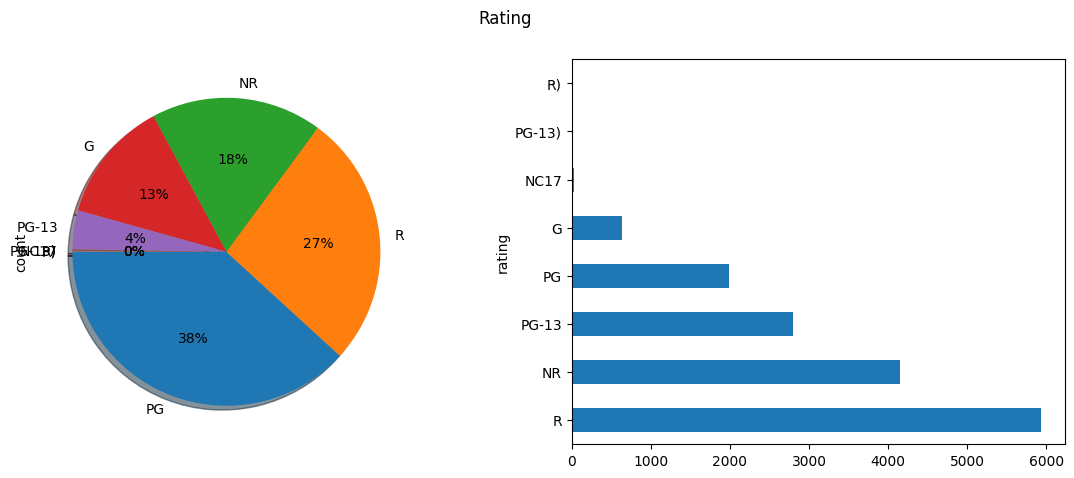

In [18]:
plot_categorial("rating")

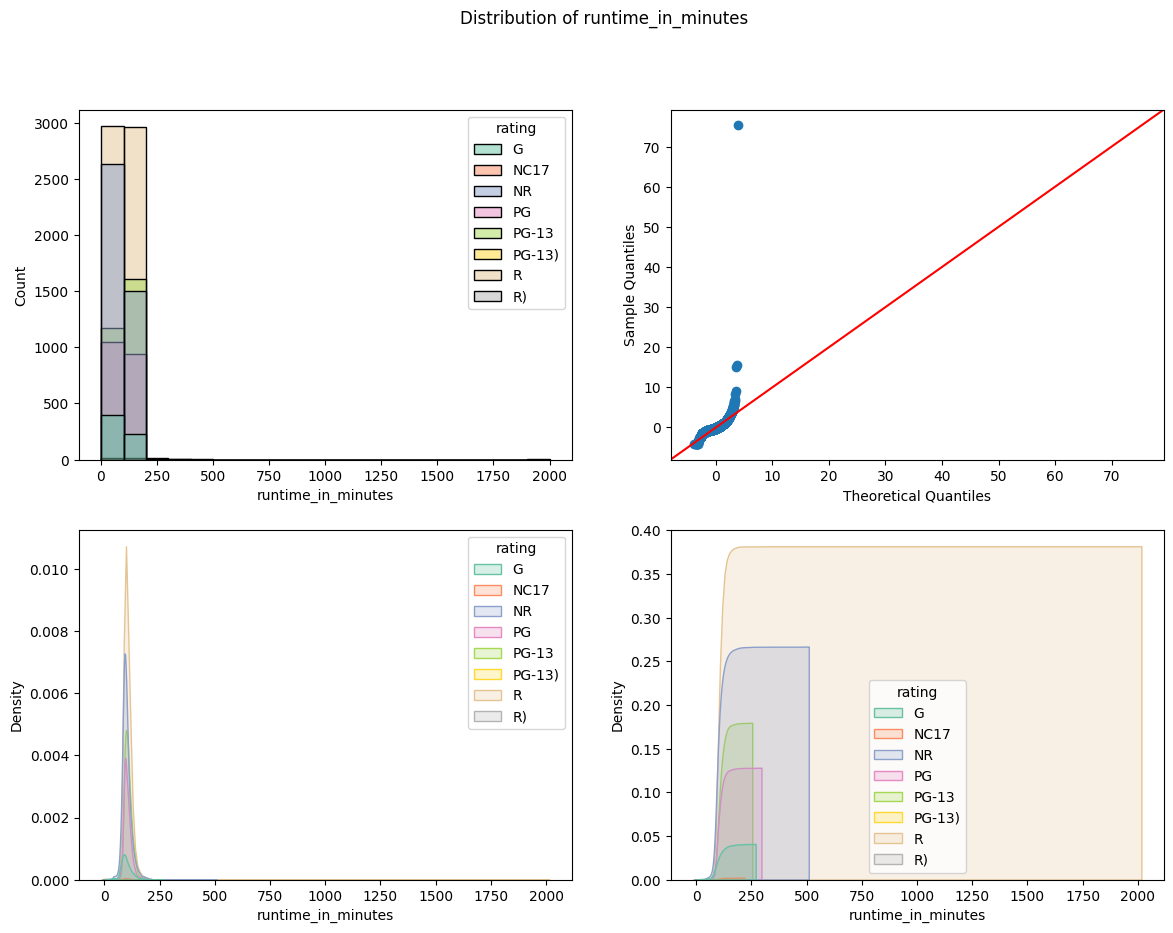

In [19]:
plot_distribution(df.columns[1])

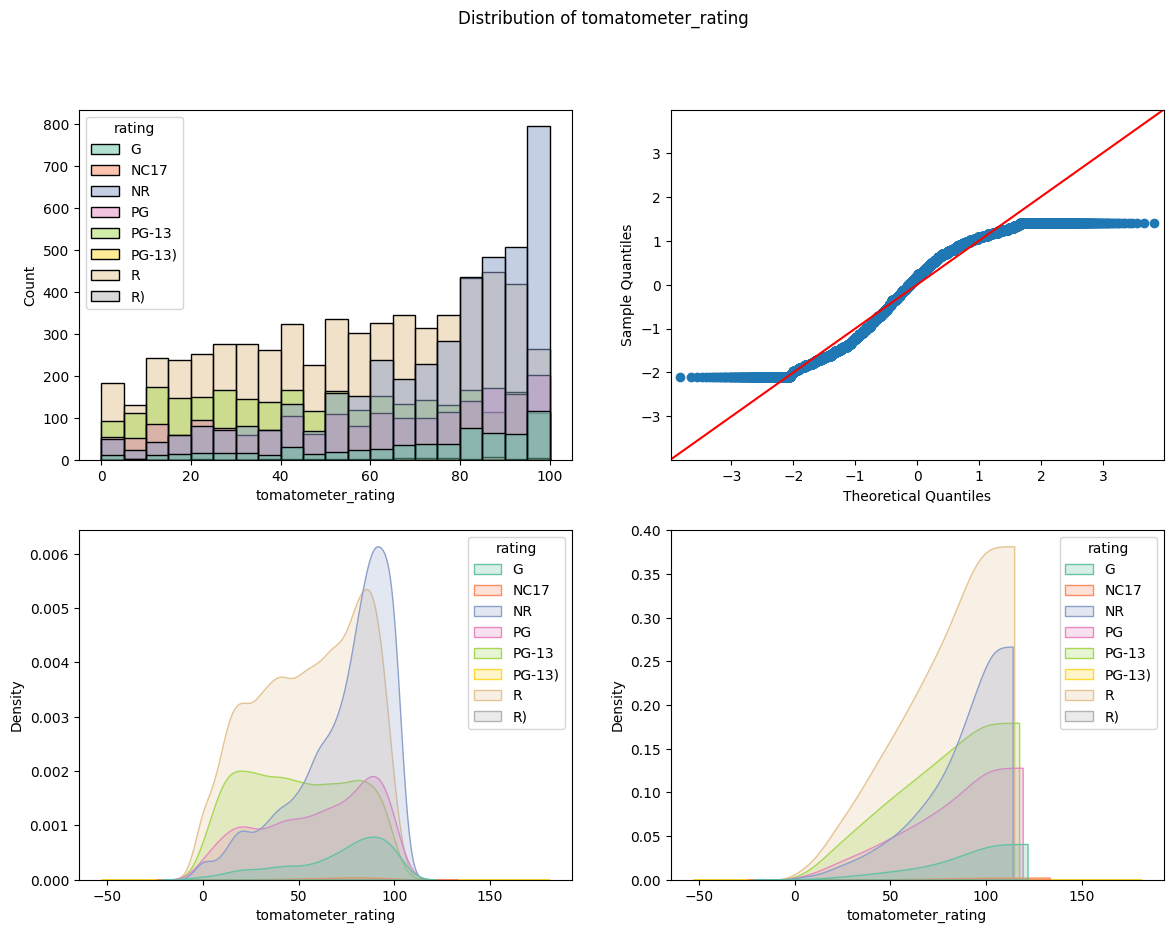

In [20]:
plot_distribution(df.columns[2])

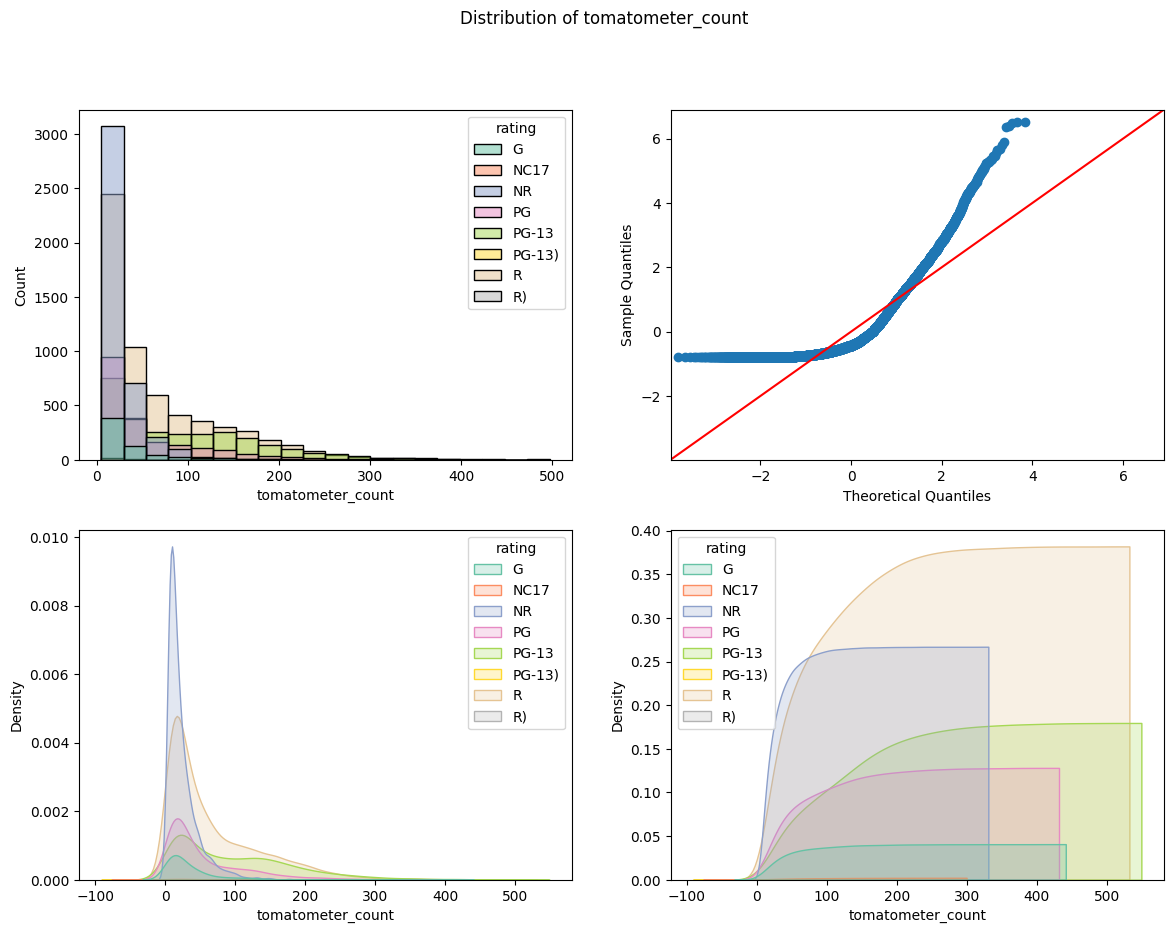

In [21]:
plot_distribution(df.columns[3])

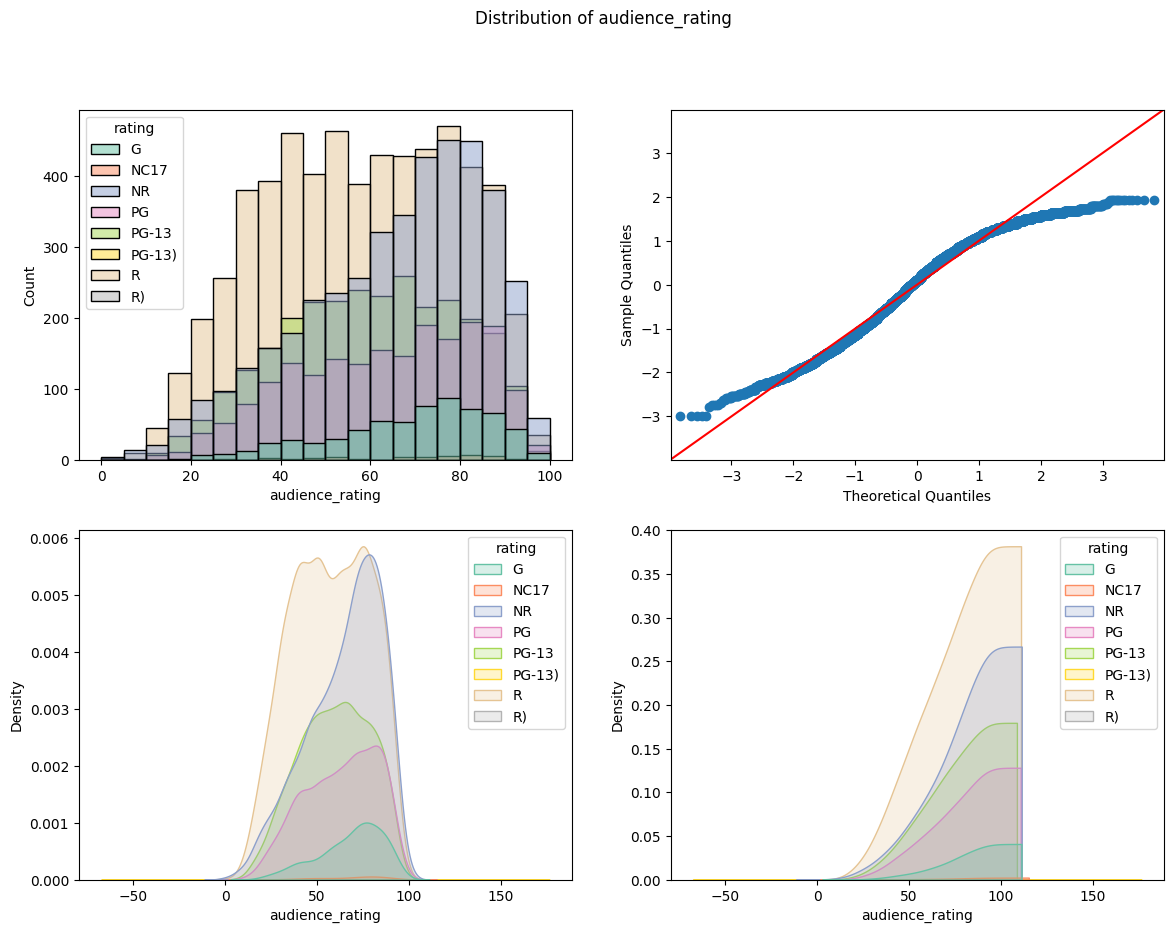

In [22]:
plot_distribution(df.columns[4])

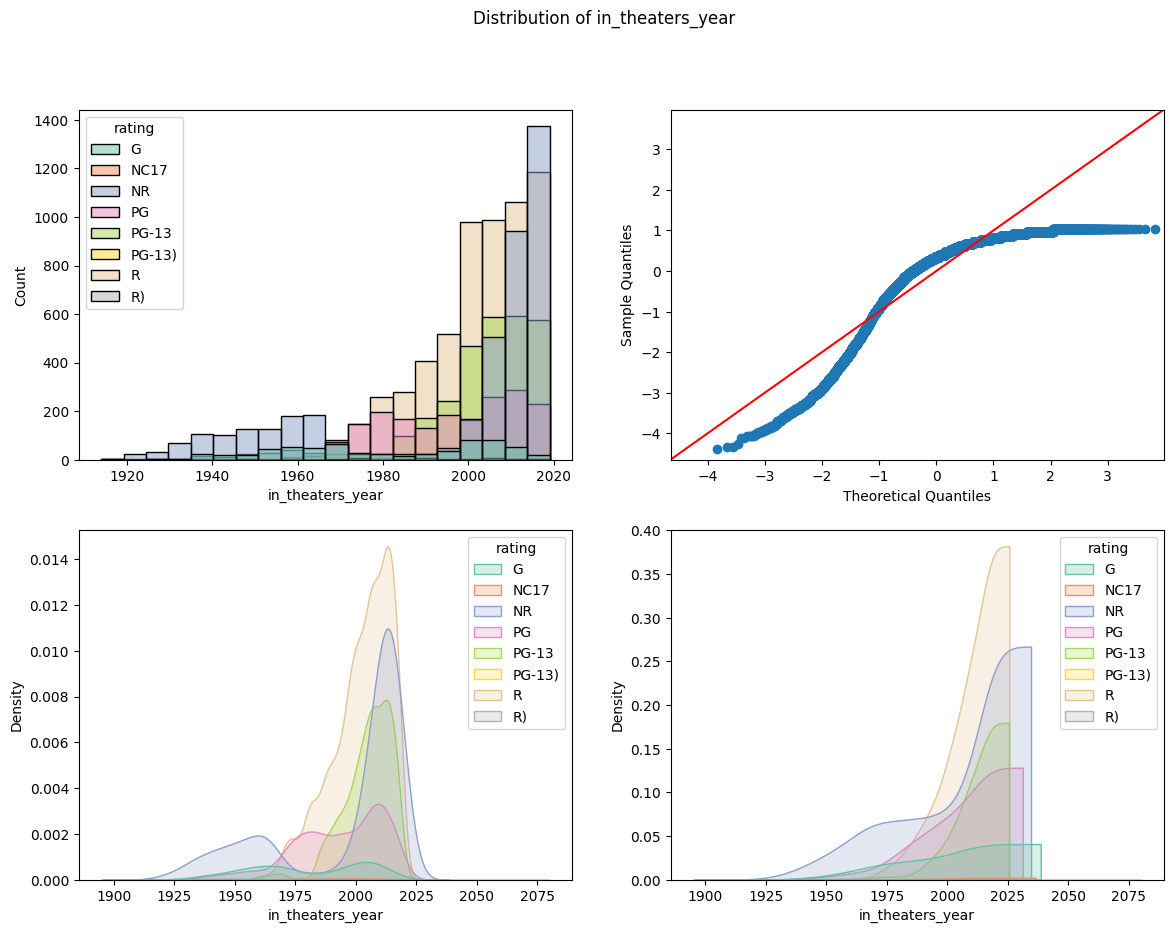

In [23]:
plot_distribution(df.columns[5])

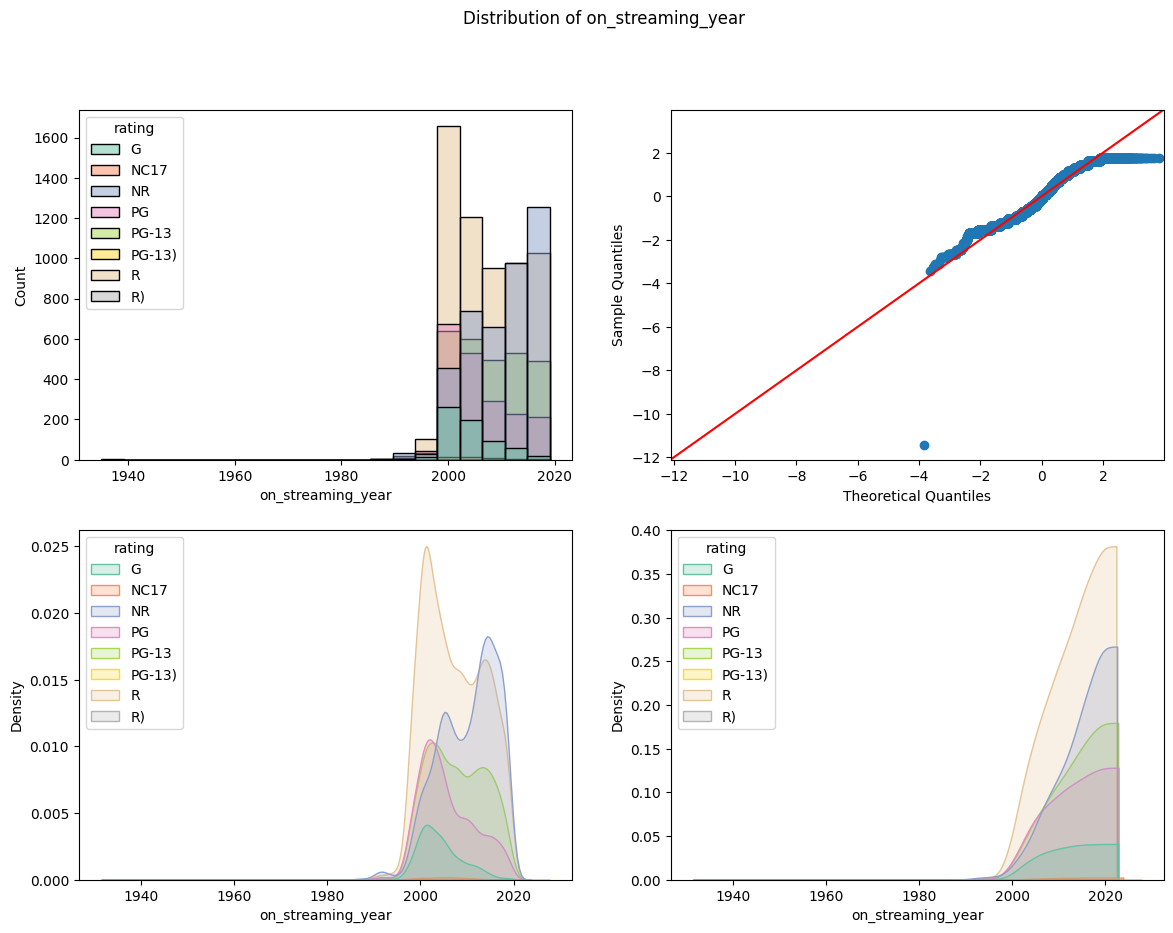

In [24]:
plot_distribution(df.columns[6])

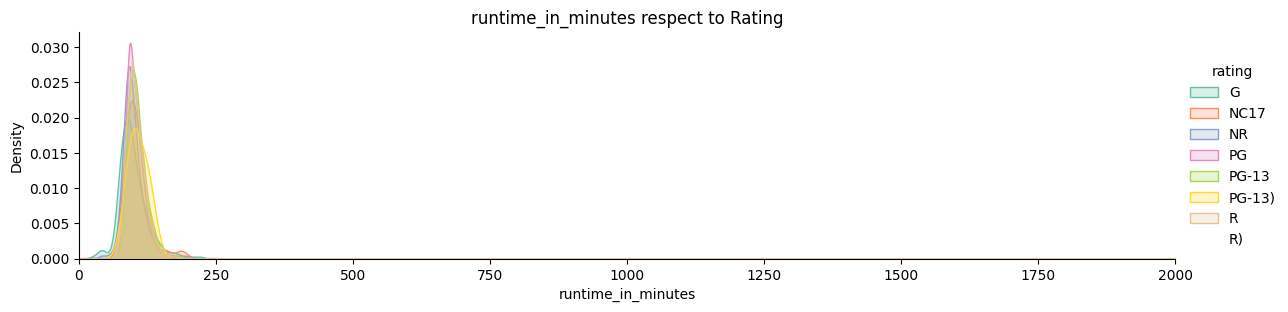

In [25]:
plot_kde(df.columns[1])

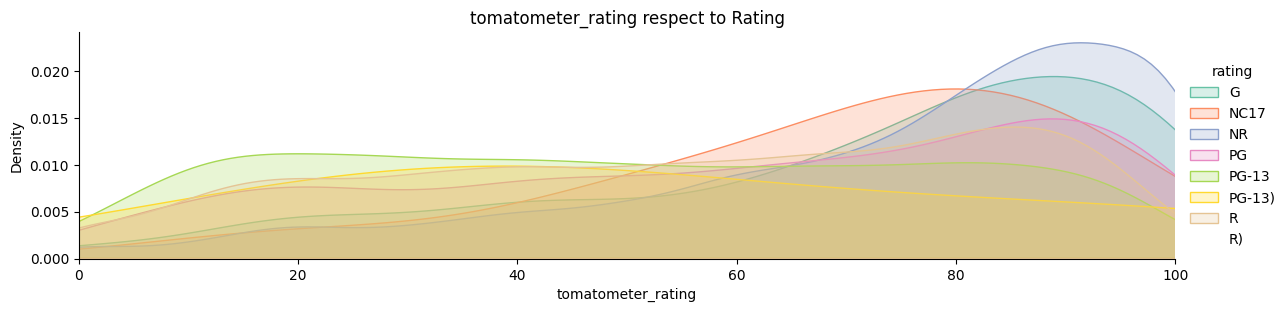

In [26]:
plot_kde(df.columns[2])

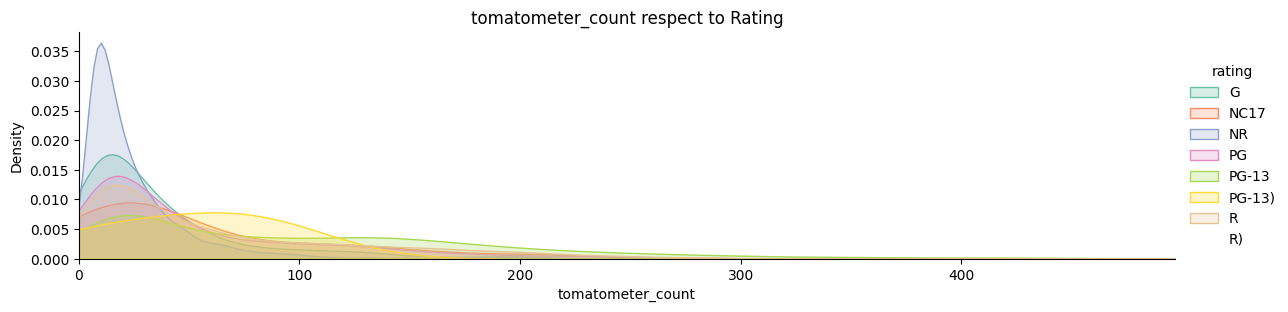

In [27]:
plot_kde(df.columns[3])

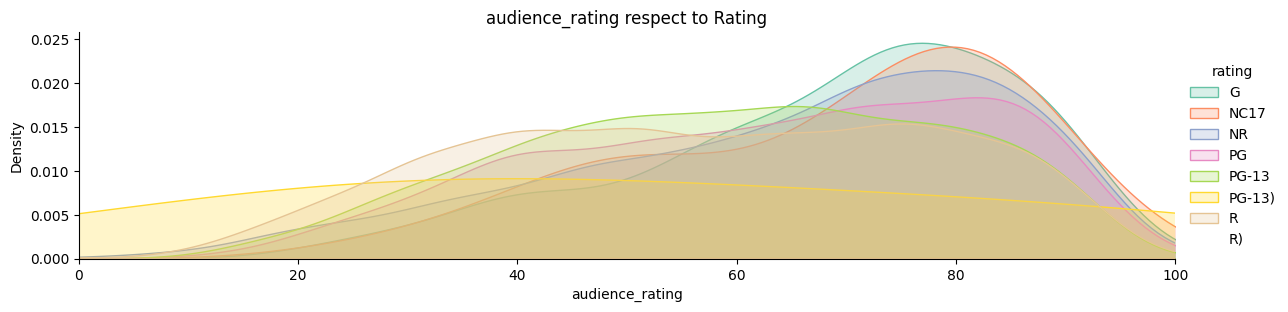

In [28]:
plot_kde(df.columns[4])

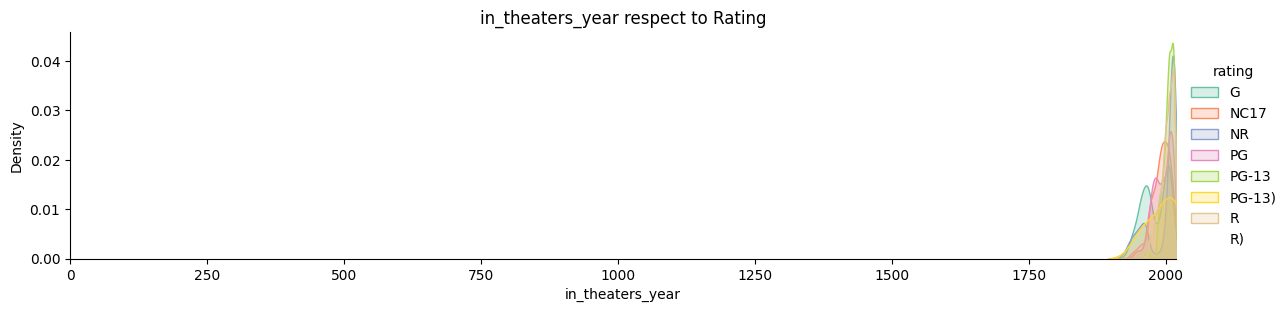

In [29]:
plot_kde(df.columns[5])

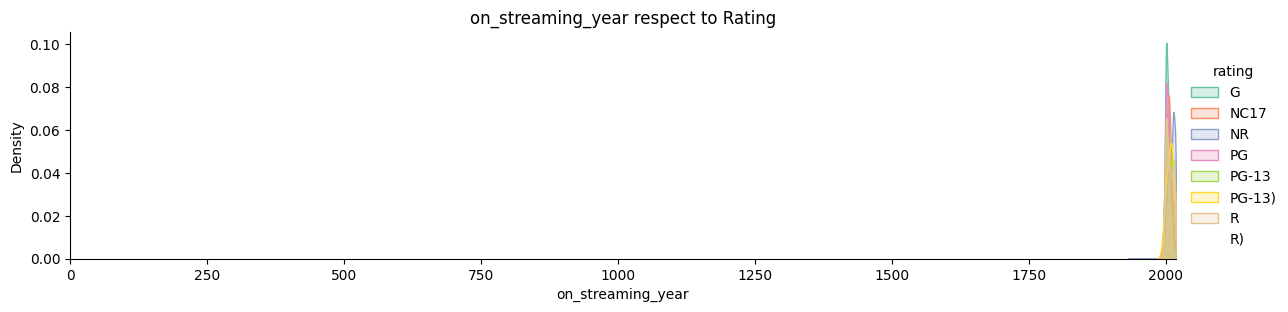

In [30]:
plot_kde(df.columns[6])

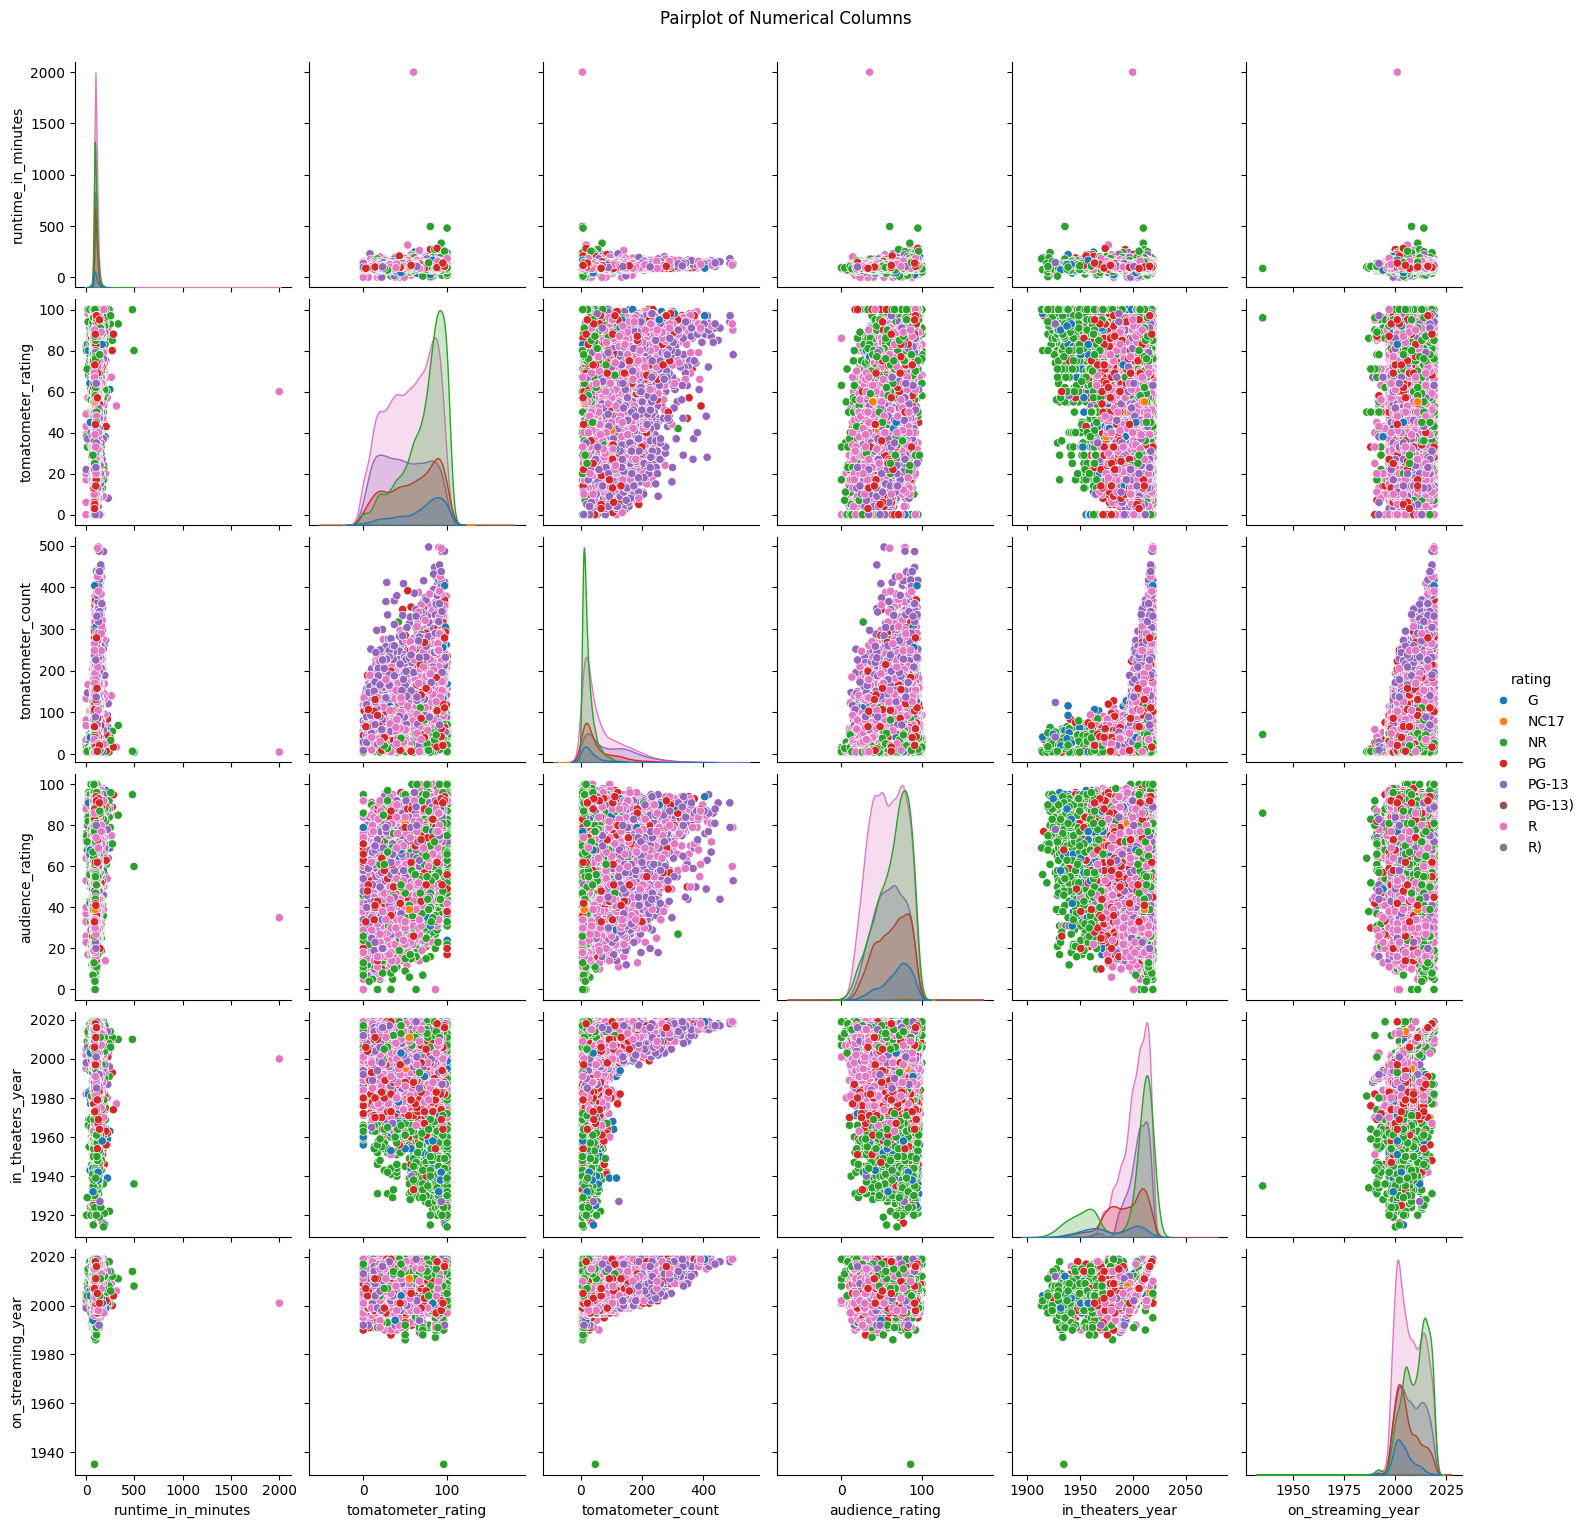

In [31]:
sns.pairplot(df, hue="rating")
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()